# Best Neighborhood in Pittsburgh

## The Data Detectives

### Introduction

To figure out the best neighborhood in Pittsburgh, we analyzed data from the WPRDC across three key areas that, in our view, make a neighborhood stand out:
* Fire Incident Frequency
* Capital Projects (Investment)
* Crime Rate

We chose these metrics because they cover three important pillars of a great neighborhood: safety, investment in infrastructure, and overall livability. After all, if a neighborhood is safe, well-funded, and has a low crime rate, it's likely a great place to live.

But we also wanted to take a more analytical approach. This isn't just about which neighborhood feels like the best, it's about using data to back up those feelings. So we dug into the datasets, cleaned them up, and used them to calculate how each neighborhood stands in relation to the others.

---

### Metrics

The goal was to come up with an objective way to rank each neighborhood using these three metrics. Here's a breakdown of how we approached each one:

#### Police Arrest Data

Low crime is an important factor when considering a great neighborhood. We analyzed police arrest data to calculate the crime rate in each area. To make it fair, we adjusted the crime rate based on the population size of each neighborhood, ensuring that areas with higher populations didn’t get penalized for having more total crimes.

We divided total crimes by the population of each neighborhood to get a normalized crime rate per capita. Lower crime rates earned higher scores. This yielded the 5 lowest crime rate neighborhoods of:
1. Mount Oliver
2. Central Northside
3. Swisshelm Park
4. Squirrel Hill North
5. New Homestead

#### Capital Project Data

Neighborhoods with higher levels of investment typically have better roads, parks, public spaces, and general infrastructure. This makes them more appealing for both residents and businesses. We used capital project data to evaluate how much investment each neighborhood has received in recent years.

We counted and categorized these projects (such as road repairs, park improvements, and new community centers) and only kept track of the completed projects. The top 5 winners are as follows:
1. Brookline
2. Central Business District
3.  Allegheny Center
4.  Greenfield
5.  Beechview

#### Fire Incident Data

Neighborhoods within the Pittsburgh area that had the lowest level of alarms makes them typically more safer compared to the ones with the highest. We used a fire alarm dataset to get the total amount of alarms called in each neighborhood. The neighborhoods with the lowest amount of alarms recieved the highest score.

The top 3 neighborhoods with the lowest amounts of alarms called were:
1. Mount Oliver 
2. Regent Square
3. East Carnegie
4. Ridgemount
5. Arlington Heights

#### Conclusion

After analyzing data on crime rates, fire incidents, and capital investment, Mount Oliver stood out as the best neighborhood. It had the lowest crime rate and the fewest fire alarms, which says a lot about how safe and stable the neighborhood is. Even though it didn’t rank in the top five for capital investment, its strong performance in safety makes it a clear winner.

Other neighborhoods like Central Northside, Brookline, and Regent Square also performed well in specific areas, showing that strengths vary across different neighborhoods depending on the metric. This shows the importance of using multiple aspects when evaluating what makes a neighborhood "the best."

---

### Police Arrest Data

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

police_data = pd.read_csv("https://data.wprdc.org/datastore/dump/044f2016-1dfd-4ab0-bc1e-065da05fca2e",usecols=["INCIDENTNEIGHBORHOOD"])
population_data = pd.read_csv("https://data.wprdc.org/dataset/95af9f2c-61c8-446b-ae72-852e195684f3/resource/a8414ed5-c50f-417e-bb67-82b734660da6/download/preliminarycitypittsburghneighborhood_pl94171summary-2.csv", usecols=["Neighborhood", "2020_Total_Population"]).dropna(subset=["Neighborhood"])
population_data["Neighborhood"] = population_data["Neighborhood"].replace("Central Business District (Downtown)", "Central Business District")
police_data["INCIDENTNEIGHBORHOOD"] = police_data["INCIDENTNEIGHBORHOOD"].replace("Mt. Oliver Neighborhood", "Mt. Oliver")

police_data.head(5)

,INCIDENTNEIGHBORHOOD
0,North Shore
1,Upper Lawrenceville
2,Northview Heights
3,Golden Triangle/Civic Arena
4,Northview Heights


In [38]:
population_data.head(20)

,Neighborhood,2020_Total_Population
0,Allegheny Center,1419
1,Allegheny West,540
2,Allentown,2305
3,Arlington - Arlington Heights (Combined),2040
4,Banksville,4127
5,Bedford Dwellings,1386
6,Beechview,7596
7,Beltzhoover,1604
8,Bloomfield,8665
9,Bluff,5882


In [40]:
# Counts incidents 
incident_counts = police_data["INCIDENTNEIGHBORHOOD"].value_counts().rename_axis("Neighborhood").reset_index(name="Police Count")
# Merge data
data = pd.merge(incident_counts, population_data, on="Neighborhood", how="left")

data.head(5)

,Neighborhood,Police Count,2020_Total_Population
0,Central Business District,19943,5477.0
1,South Side Flats,19098,7467.0
2,Carrick,11927,10290.0
3,Shadyside,8773,15317.0
4,Bloomfield,8704,8665.0


In [49]:
# Calculate values per capita
data["Police per Capita"] = data["Police Count"] / data["2020_Total_Population"]
data = data[data["Police per Capita"] > 0].sort_values("Police per Capita").head(10)

data.head(5)

,Neighborhood,Police Count,2020_Total_Population,Police per Capita
96,Mt. Oliver,117,443.0,0.264108
78,Central Northside,786,2972.0,0.264468
88,Swisshelm Park,443,1339.0,0.330844
31,Squirrel Hill North,4088,11879.0,0.344137
91,New Homestead,353,917.0,0.384951


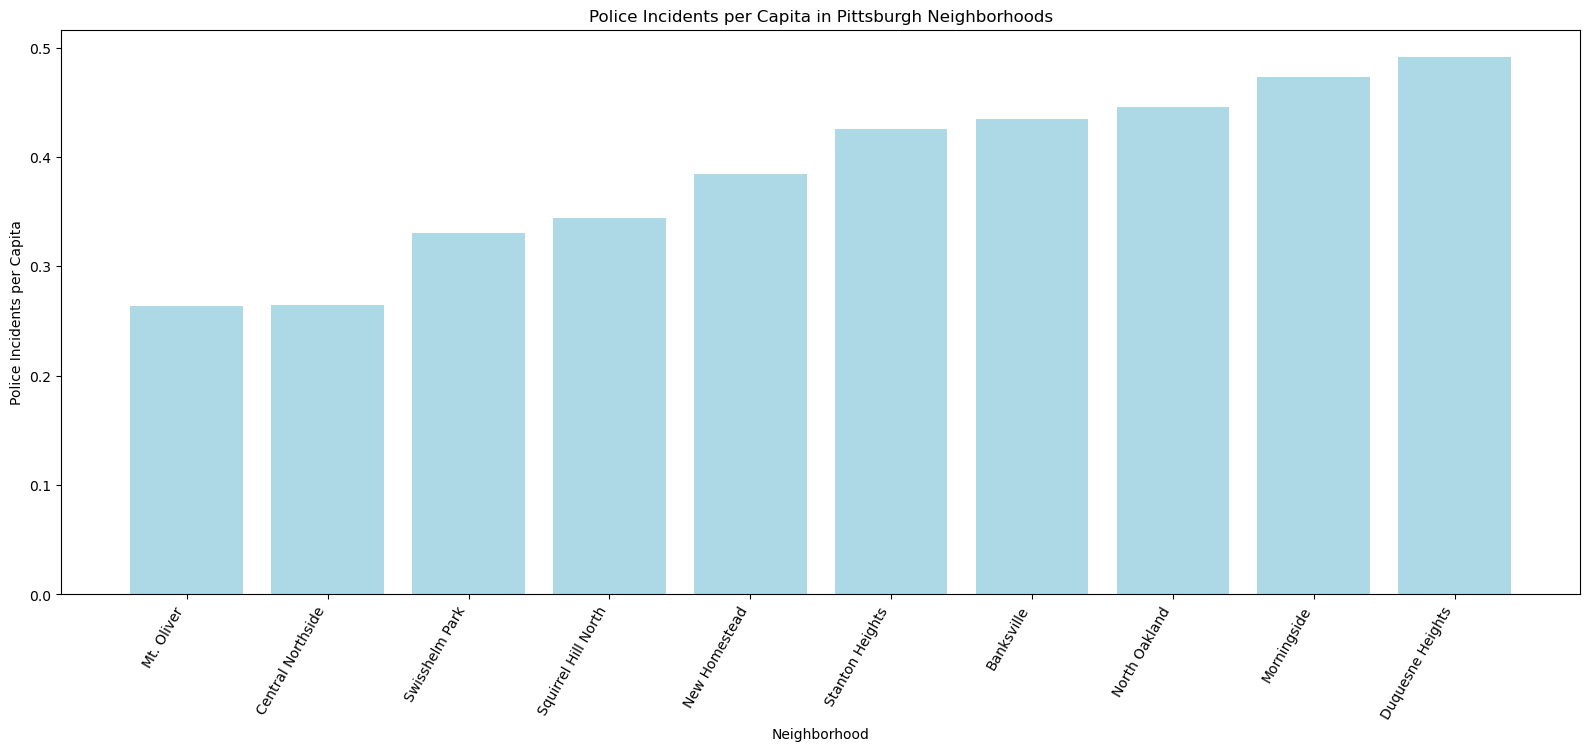

In [48]:
# Plot the bar chart
plt.figure(figsize=(16, 8))
plt.bar(data["Neighborhood"], data["Police per Capita"], color="lightblue")
plt.title("Police Incidents per Capita in Pittsburgh Neighborhoods")
plt.xlabel("Neighborhood")
plt.ylabel("Police Incidents per Capita")
plt.xticks(rotation=60, ha="right")
plt.tight_layout()
plt.subplots_adjust(bottom=0.25)
plt.show()

---

### Capital Project Data

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

projects_csv = "https://data.wprdc.org/datastore/dump/2fb96406-813e-4031-acfe-1a82e78dc33c"

neighborhood_data = pd.read_csv(projects_csv, usecols=["neighborhood", "status"])

neighborhood_data.head(5)


,status,neighborhood
0,Planned,Manchester
1,Planned,Banksville
2,Planned,Banksville
3,Planned,Central Oakland
4,Planned,Central Oakland


In [46]:
# Look for only completed projects
neighborhood_data["status"] = neighborhood_data["status"].str.strip()
complete_projects = neighborhood_data[neighborhood_data["status"].str.lower() == "completed"]

# Count completed projects
neighborhood_counts = complete_projects["neighborhood"].value_counts()
neighborhood_counts.head(5)

neighborhood
Brookline                    8
Central Business District    6
Allegheny Center             6
Greenfield                   5
Beechview                    5
Name: count, dtype: int64

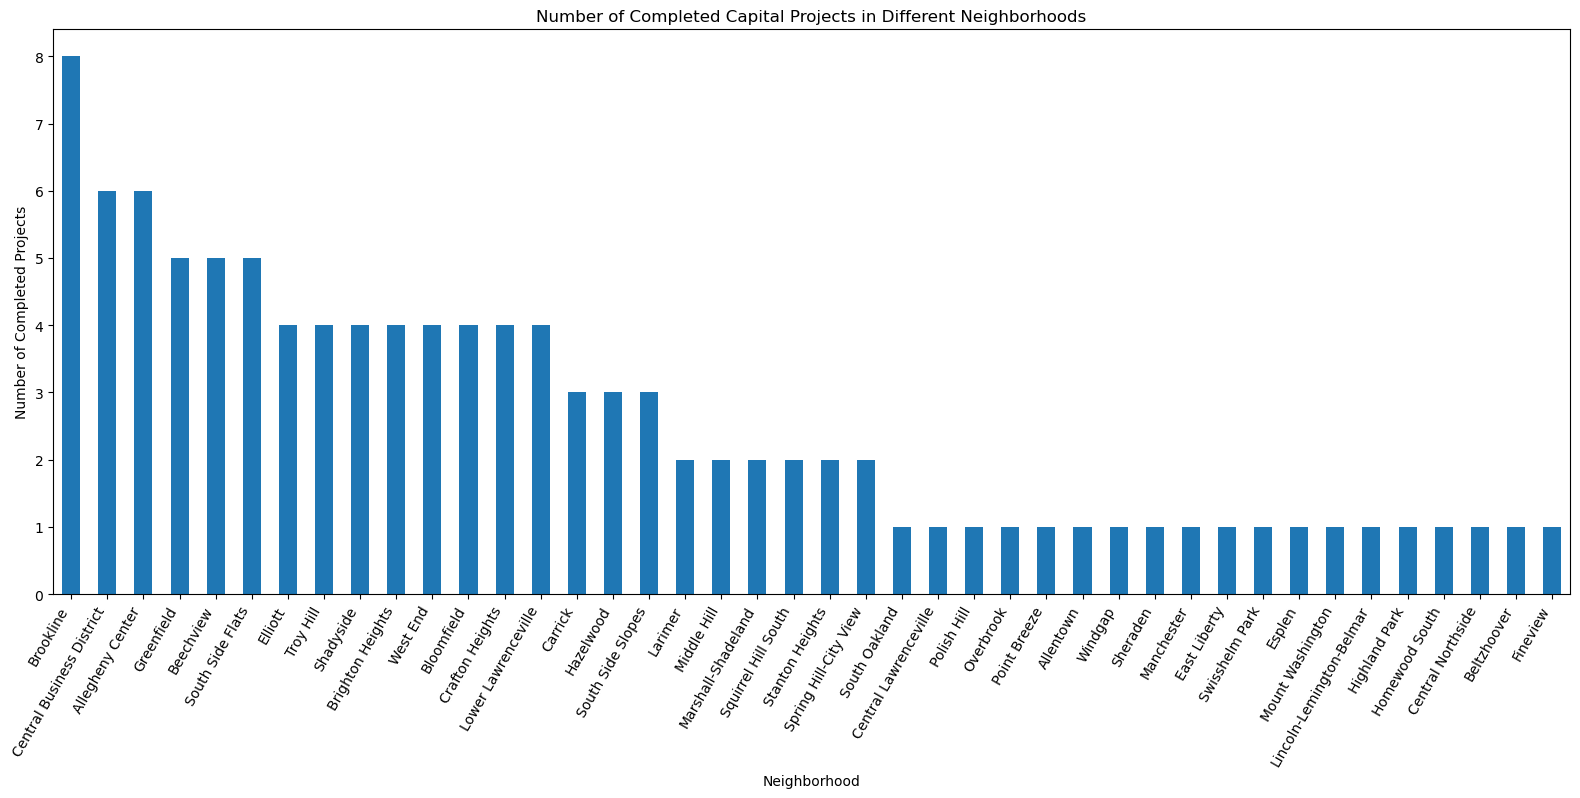

In [47]:
# Plot a bar chart
plt.figure(figsize=(16, 8))
neighborhood_counts.plot(kind='bar')

plt.title("Number of Completed Capital Projects in Different Neighborhoods")
plt.xlabel("Neighborhood")
plt.ylabel("Number of Completed Projects")
plt.xticks(rotation=60, ha='right')

plt.tight_layout()
plt.subplots_adjust(bottom=0.25)
plt.show()

---

### Fire Data

In [2]:
import geopandas
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
fire = pd.read_csv("https://data.wprdc.org/datastore/dump/8d76ac6b-5ae8-4428-82a4-043130d17b02")


In [4]:
fire.tail(7)

,_id,call_no,incident_type,type_description,address,alarms,alarm_time,primary_unit,census_tract,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
10487,19405,F250033452,111.0,Building fire,"2100 BLOCK LOWRIE ST, PITTSBURGH PA 15212",1,2025-04-11T18:28:37,231EN32,2406.0,Troy Hill,1.0,24.0,4.200324e+10,1.0,24.0,1.0,1-2,40.469265,-79.978850
10488,19406,F250033712,160.0,"Special outside fire, Other","00 BLOCK PANTHER HOLLOW BRIDGE, PITTSBURGH PA",0,2025-04-12T18:58:17,231EN12,1413.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2-8,NaN,NaN
10489,19438,F250033718,151.0,"Outside rubbish, trash or waste fire","FEDERAL STREET EXT & LAFAYE, PITTSBURGH PA",0,2025-04-12T19:20:18,231EN38,2614.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1-10,NaN,NaN
10490,19471,F250033625,151.0,"Outside rubbish, trash or waste fire","100 BLOCK HENDERSON ST, PITTSBURGH PA",0,2025-04-12T13:10:26,231EN38,2509.0,Fineview,6.0,25.0,4.200325e+10,1.0,25.0,1.0,1-10,40.459090,-80.004196
10491,19472,F250033931,111.0,Building fire,"600 BLOCK SICKLES ST, PITTSBURGH PA",1,2025-04-13T16:03:33,231EN17,1306.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3-17,NaN,NaN
10492,19473,F250034247,113.0,"Cooking fire, confined to container","6500 BLOCK LANDVIEW RD, PITTSBURGH PA",1,2025-04-14T14:57:16,231EN12,1414.0,Squirrel Hill South,5.0,14.0,4.200314e+10,3.0,14.0,4.0,2-15,40.421640,-79.923908
10493,19474,F250034370,131.0,Passenger vehicle fire,"700 BLOCK I376 EB, PITTSBURGH PA",0,2025-04-14T20:50:03,231EN04,201.0,NaN,6.0,NaN,4.200302e+10,NaN,NaN,NaN,NaN,40.439414,-80.010172


These are the last seven neighborhoods within Pittsburgh that have experinced a fire of some type. Now let's see which neighborhoods has the most alarms. 
We can do this by using pandas and filtering the data, adding up the numbers in each neighborhood district instead of using the adresses. 
This would make reading the data easier.

In [6]:
number_alarms  = fire.groupby('neighborhood')['alarms'].count()
number_alarms

neighborhood
Allegheny Center        63
Allegheny West          43
Allentown              133
Arlington               54
Arlington Heights       13
                      ... 
Upper Lawrenceville     56
West End                23
West Oakland            65
Westwood                28
Windgap                 24
Name: alarms, Length: 91, dtype: int64

In this data, we can the total amount of alarms that had sounded in each neighborhood. Let's go from least to greatest to get a better sense of this data to see which neighborhood has the most and least amount of alarms. From there, we can clearly see which one's are the safest.

In [7]:
number_alarms = number_alarms.sort_values(ascending = True)
number_alarms

neighborhood
Mount Oliver Borough           7
Regent Square                  9
East Carnegie                 11
Ridgemont                     12
Mt. Oliver                    12
                            ... 
Hazelwood                    262
Squirrel Hill South          273
Central Business District    297
South Side Flats             304
Carrick                      318
Name: alarms, Length: 91, dtype: int64

Now that we have the amount of alarms in each neighborhood district, let's graph it so we could see the data more clearly and visible.

<Axes: xlabel='neighborhood'>

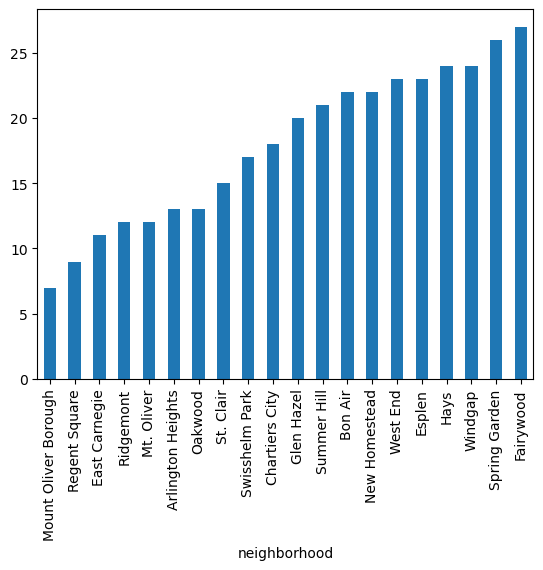

In [8]:
number_alarms[:20].plot.bar()

In [5]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") 
alarms = fire.groupby("neighborhood")['alarms'].sum().reset_index()
number_fires = neighborhoods.merge(alarms, how='left', left_on='hood', right_on='neighborhood')
number_fires.plot(column='alarms', cmap='bwr',  edgecolor="black", legend=True,legend_kwds={'label': "Number of Alarms"}, figsize=(15, 10), 
                  missing_kwds={"color": "light grey"} 
               )

DataSourceError: FINAL/fire.shp: No such file or directory